In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [29]:
data = pd.read_csv('credit_card_defaulters.csv')
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,INCOME_TOTAL,CREDIT,NAME_INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_TYPE,FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,2,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,Core staff,2.0,1,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,2,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,2,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1.0,2,Religion


In [30]:
print('rows:',data.shape[0])
print('colomns:',data.shape[1])

rows: 307511
colomns: 16


In [31]:
data = data.drop_duplicates()
len(data)

#very small percentage of rows dropped

297591

In [32]:
for col in range(int(data.shape[1])):
    print(data.columns[col], ':')
    print(data.iloc[: , col].unique(), '\n')

#exploring unique names in columns

TARGET :
[1 0] 

NAME_CONTRACT_TYPE :
['Cash loans' 'Revolving loans'] 

CODE_GENDER :
['M' 'F' nan 'XNA'] 

FLAG_OWN_CAR :
['N' 'Y'] 

FLAG_OWN_REALTY :
['Y' 'N'] 

CNT_CHILDREN :
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14] 

INCOME_TOTAL :
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5] 

CREDIT :
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ] 

NAME_INCOME_TYPE :
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

EDUCATION_TYPE :
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

FAMILY_STATUS :
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown'] 

HOUSING_TYPE :
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment'] 

OCCUPATION_TYPE :
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff'

In [33]:
print(data.isin(['XNA']).any())
#exploring where values is filled as XNA

TARGET                  False
NAME_CONTRACT_TYPE      False
CODE_GENDER              True
FLAG_OWN_CAR            False
FLAG_OWN_REALTY         False
CNT_CHILDREN            False
INCOME_TOTAL            False
CREDIT                  False
NAME_INCOME_TYPE        False
EDUCATION_TYPE          False
FAMILY_STATUS           False
HOUSING_TYPE            False
OCCUPATION_TYPE         False
FAM_MEMBERS             False
REGION_RATING_CLIENT    False
ORGANIZATION_TYPE        True
dtype: bool


In [34]:
data['CODE_GENDER'].replace(['XNA'],np.nan, inplace=True)
data['ORGANIZATION_TYPE'].replace(['XNA'],np.nan, inplace=True)


In [35]:
print(data.isnull().sum())
#exploring missing values:


TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 6
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
INCOME_TOTAL               26
CREDIT                      8
NAME_INCOME_TYPE            0
EDUCATION_TYPE              0
FAMILY_STATUS               0
HOUSING_TYPE                0
OCCUPATION_TYPE         88211
FAM_MEMBERS                 2
REGION_RATING_CLIENT        0
ORGANIZATION_TYPE       47443
dtype: int64


In [36]:
#dropping null values in CODE_GENDER INCOME_TOTAL CREDIT  FAM_MEMBERS  as very few values compared to size of dataset    
data = data.dropna(subset = ['CODE_GENDER', 'FAM_MEMBERS','INCOME_TOTAL','CREDIT']) 
# dropping Occupation type and Organization typecolunm as cannot fill this colunm because alot of nan values datset will skew if mode used, and as values come from large poolof unique values and no pattern can be seen we can not fill them
data = data.drop(columns=['ORGANIZATION_TYPE','OCCUPATION_TYPE'])
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,INCOME_TOTAL,CREDIT,NAME_INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,FAM_MEMBERS,REGION_RATING_CLIENT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,2.0,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,2
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2


Data Visualization

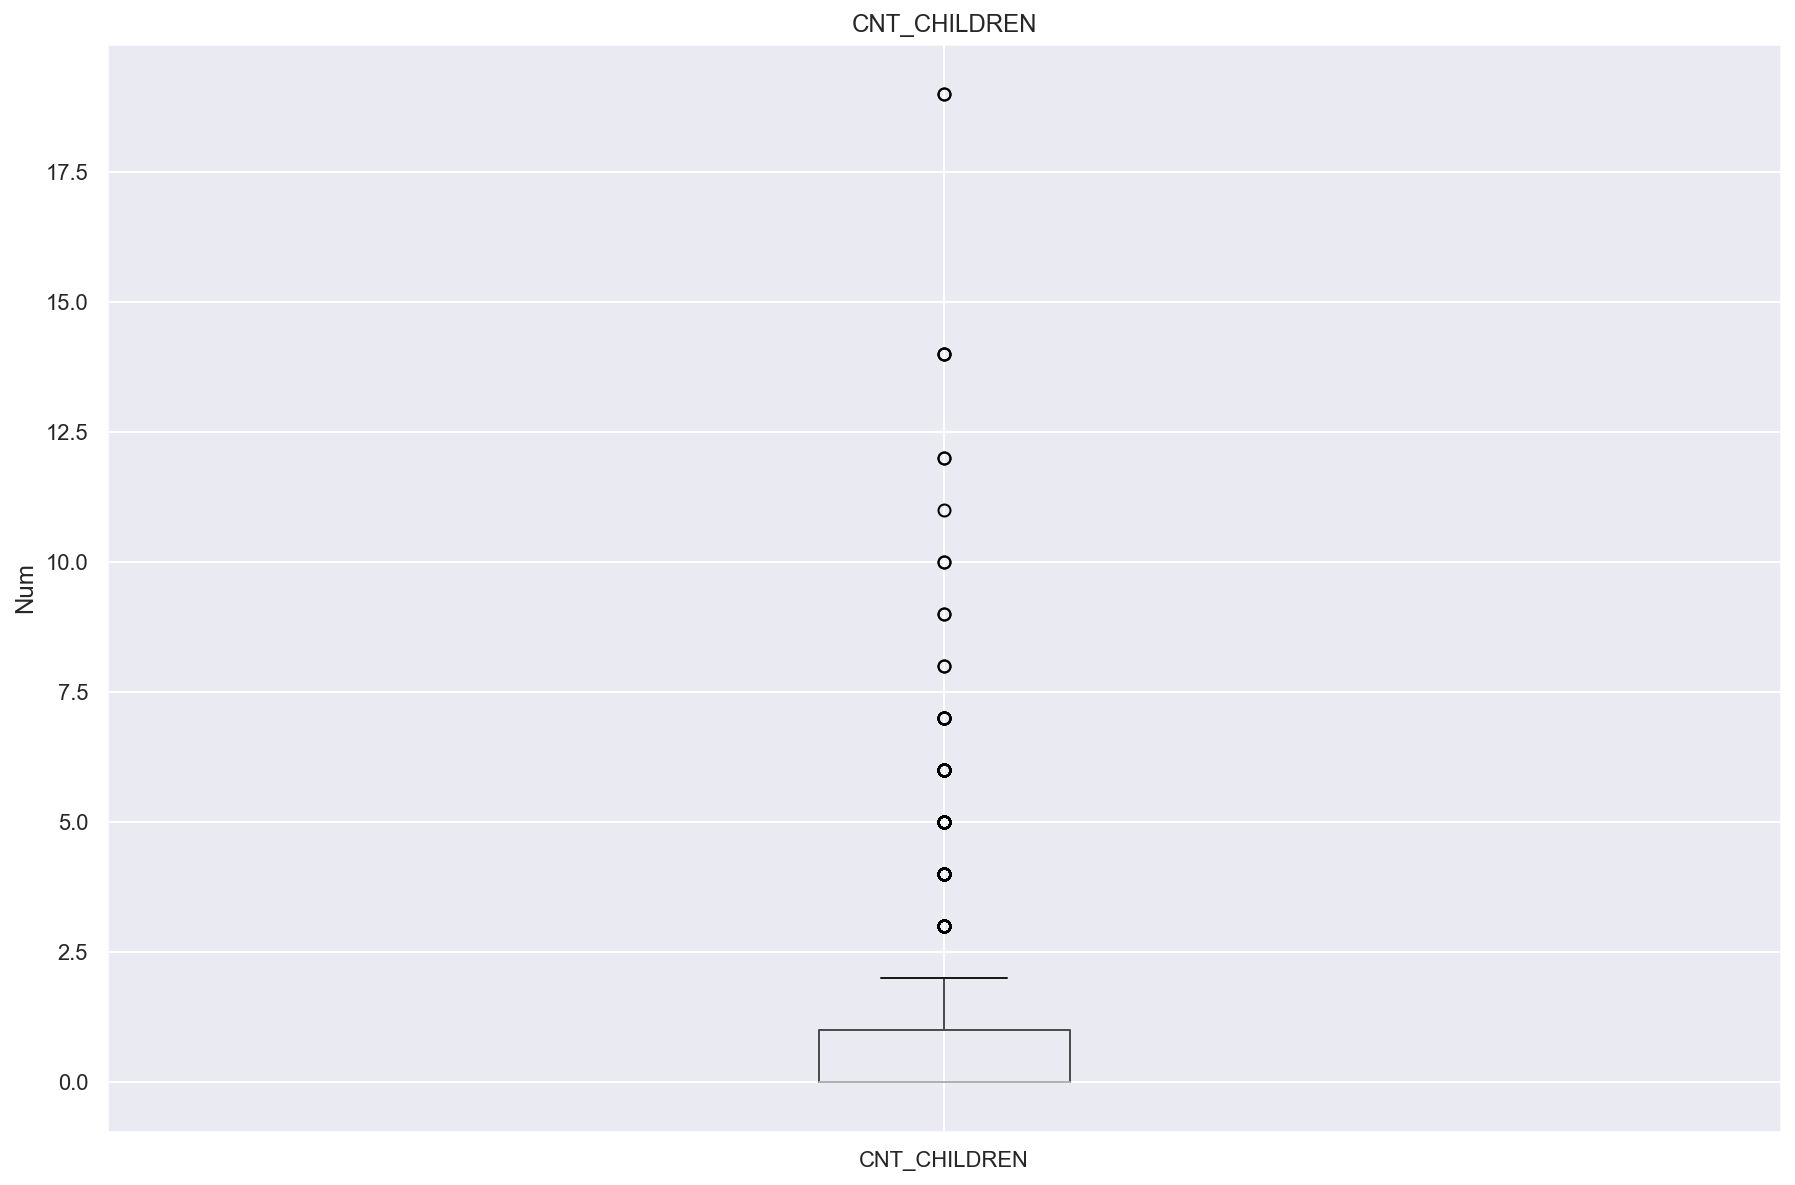

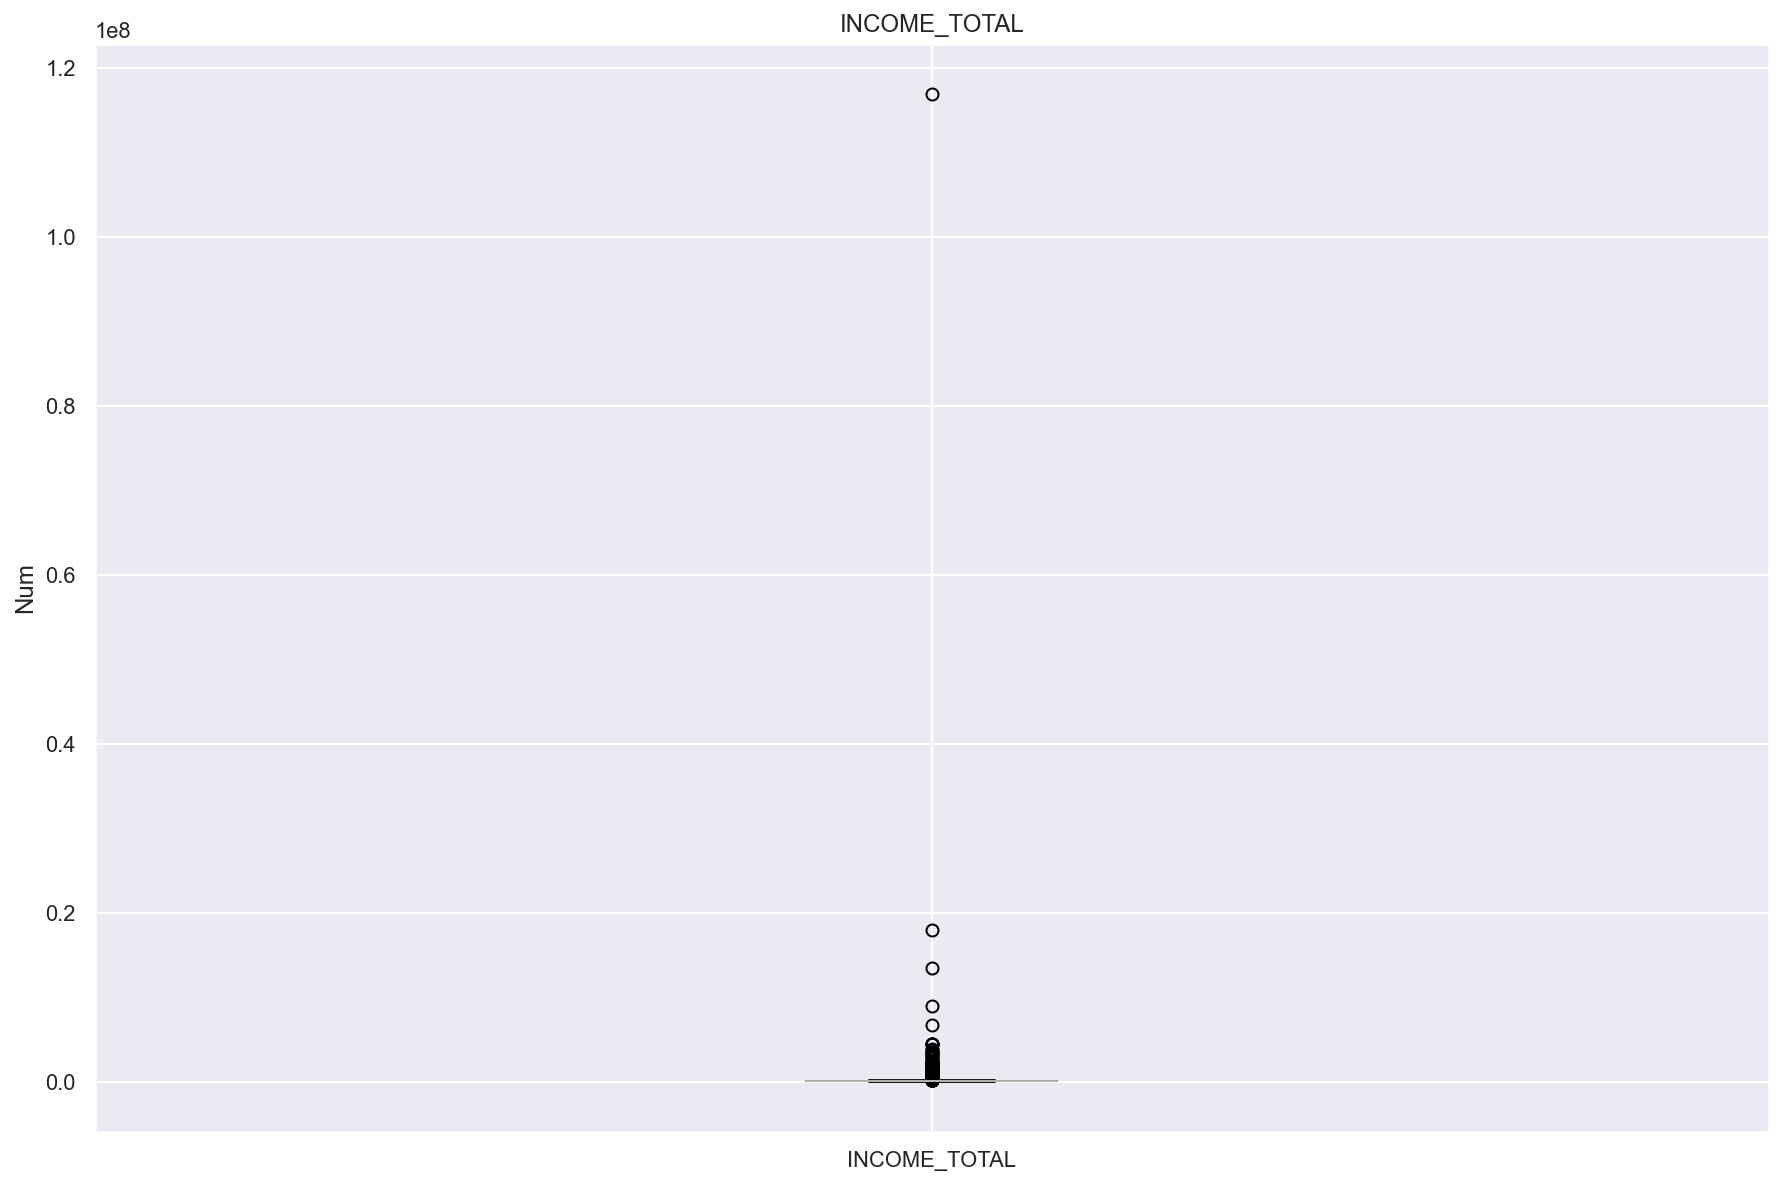

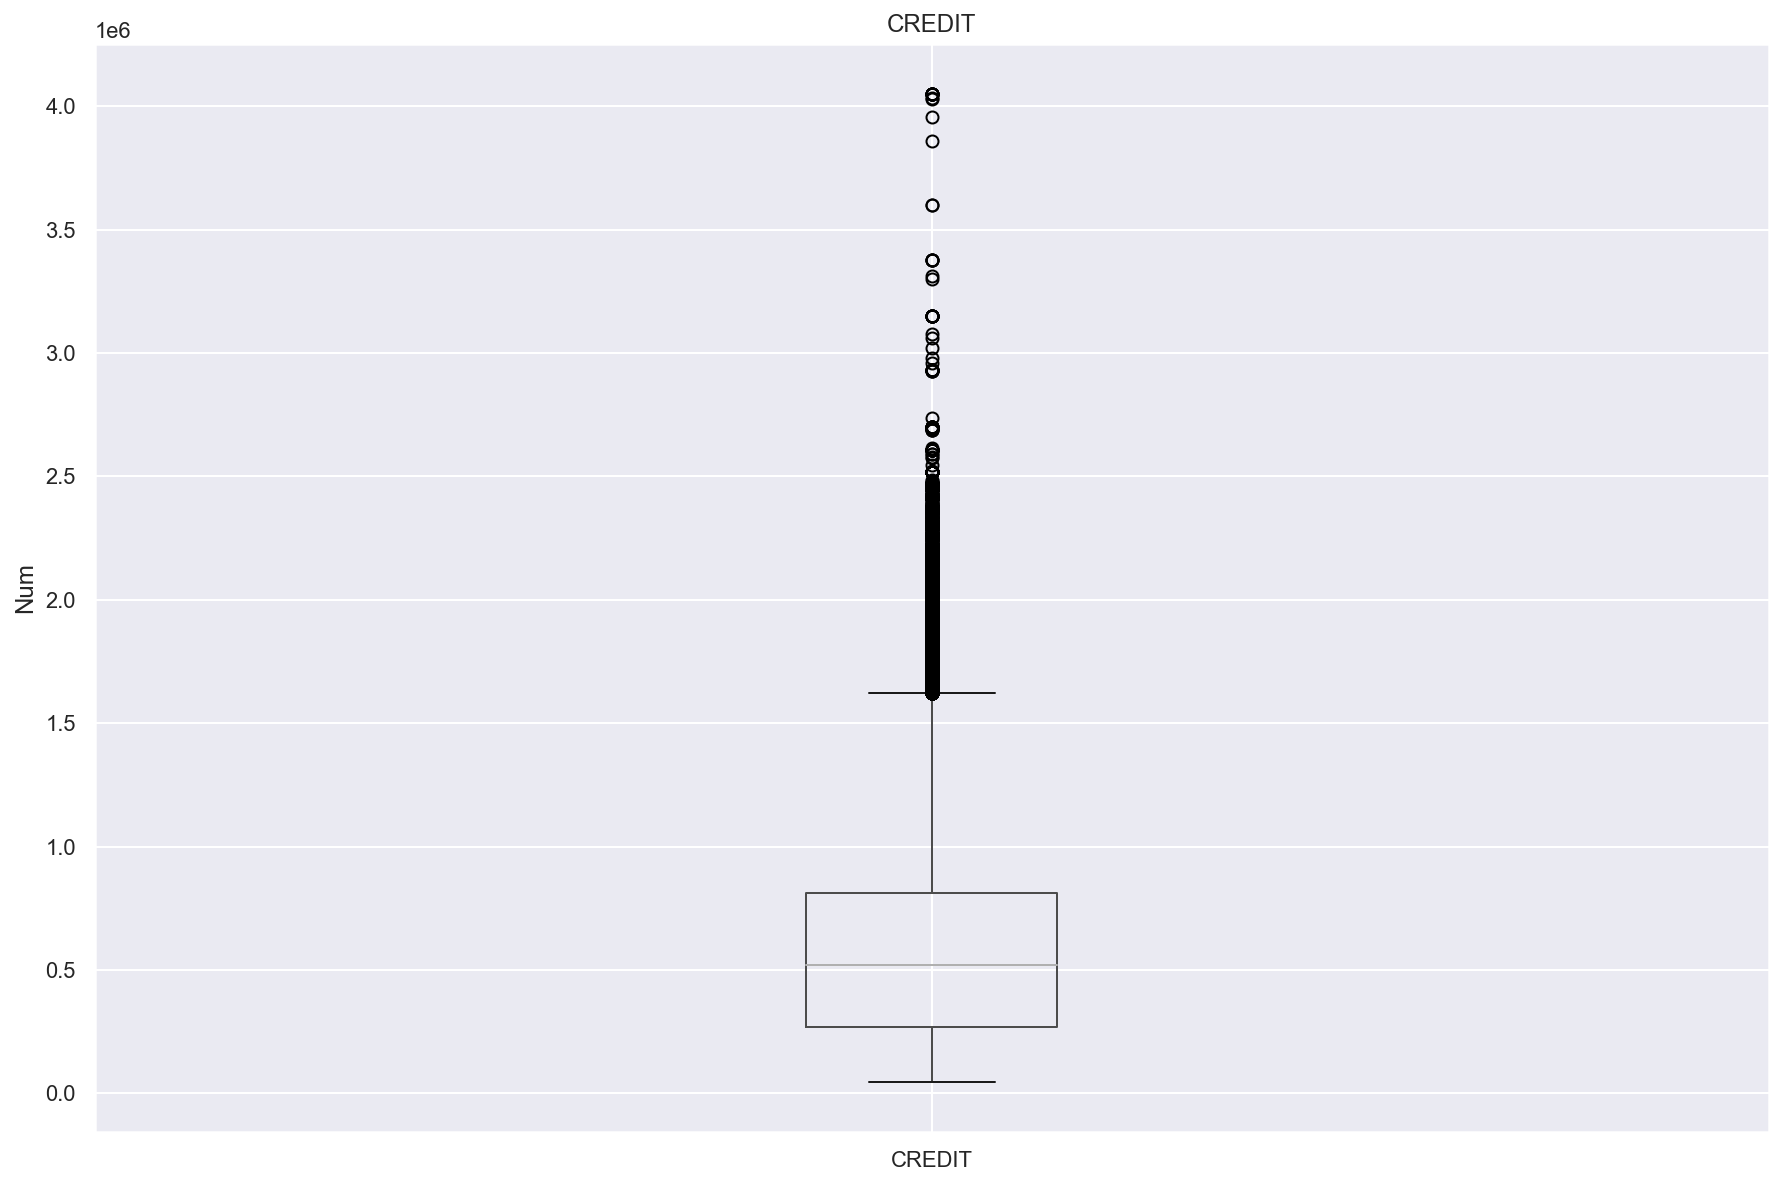

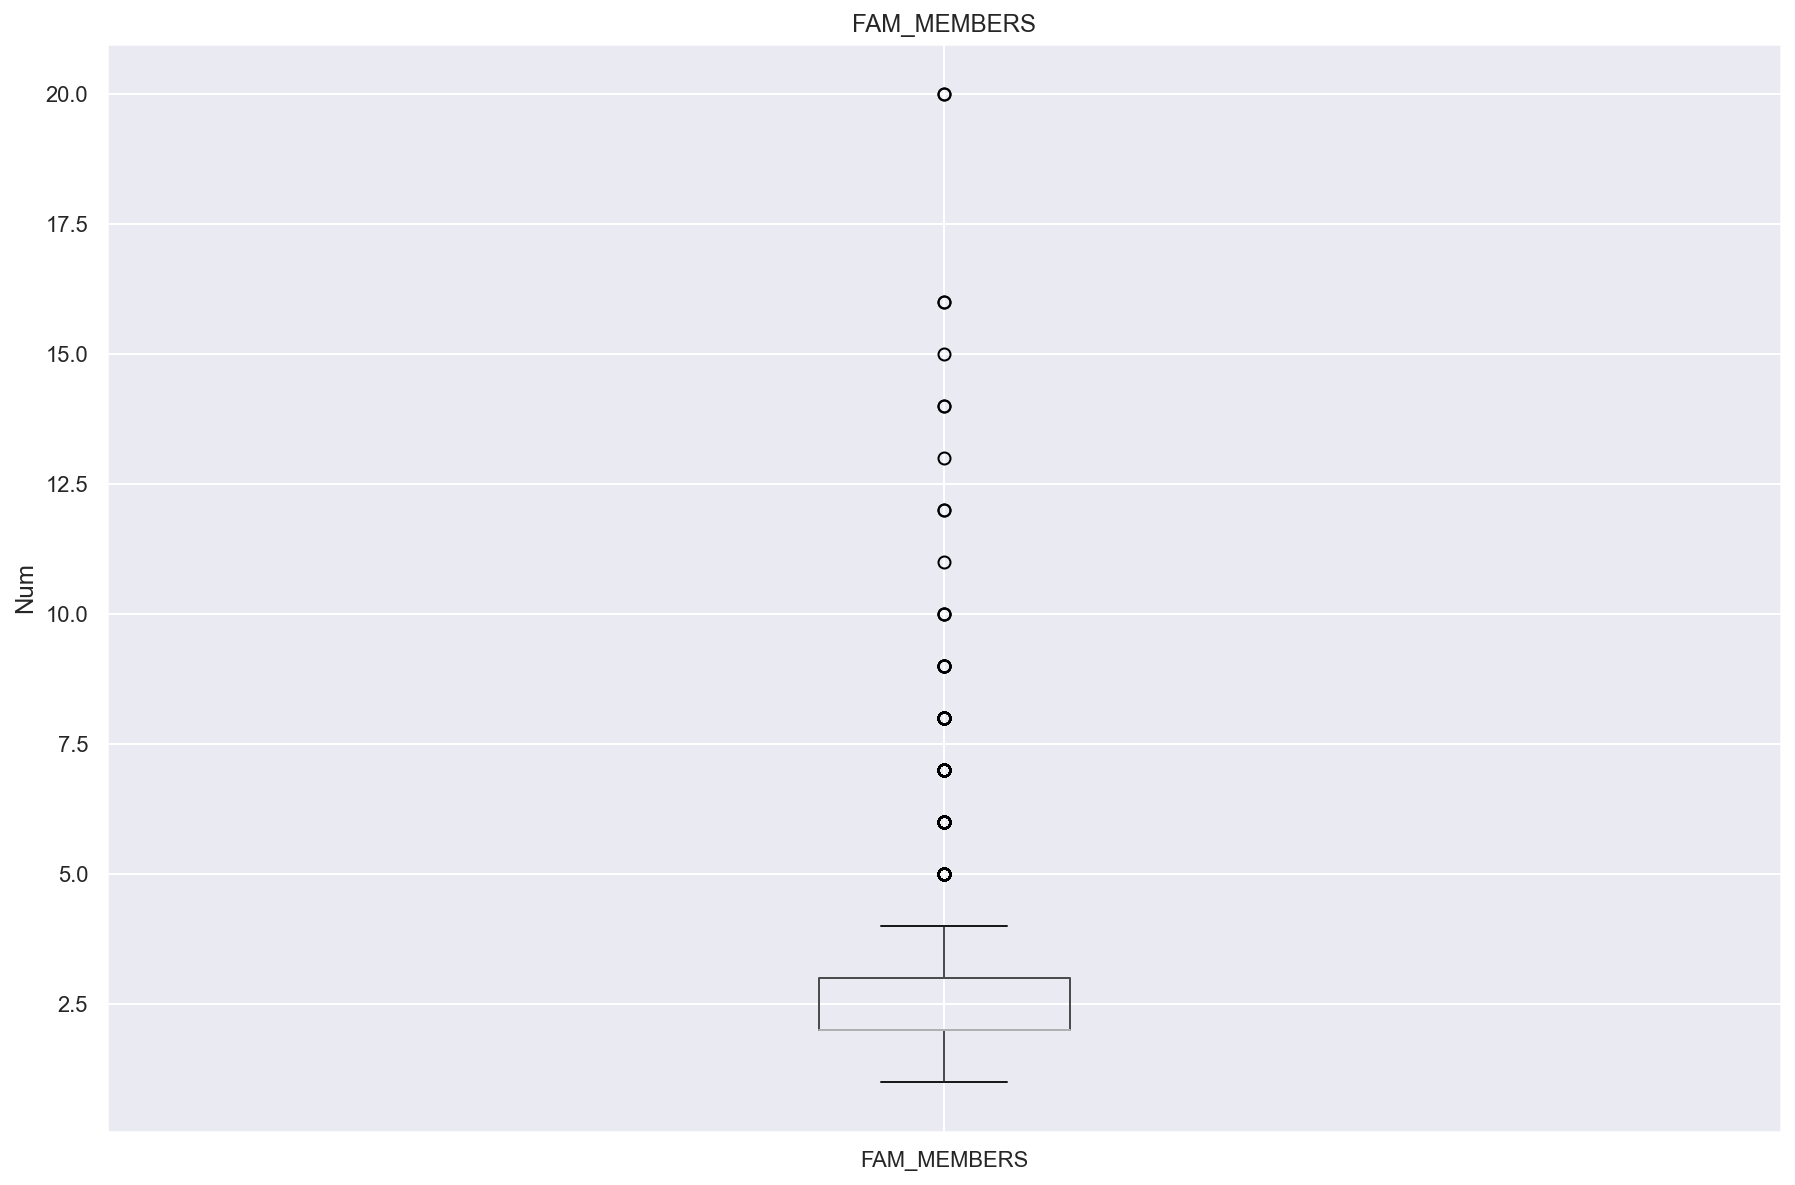

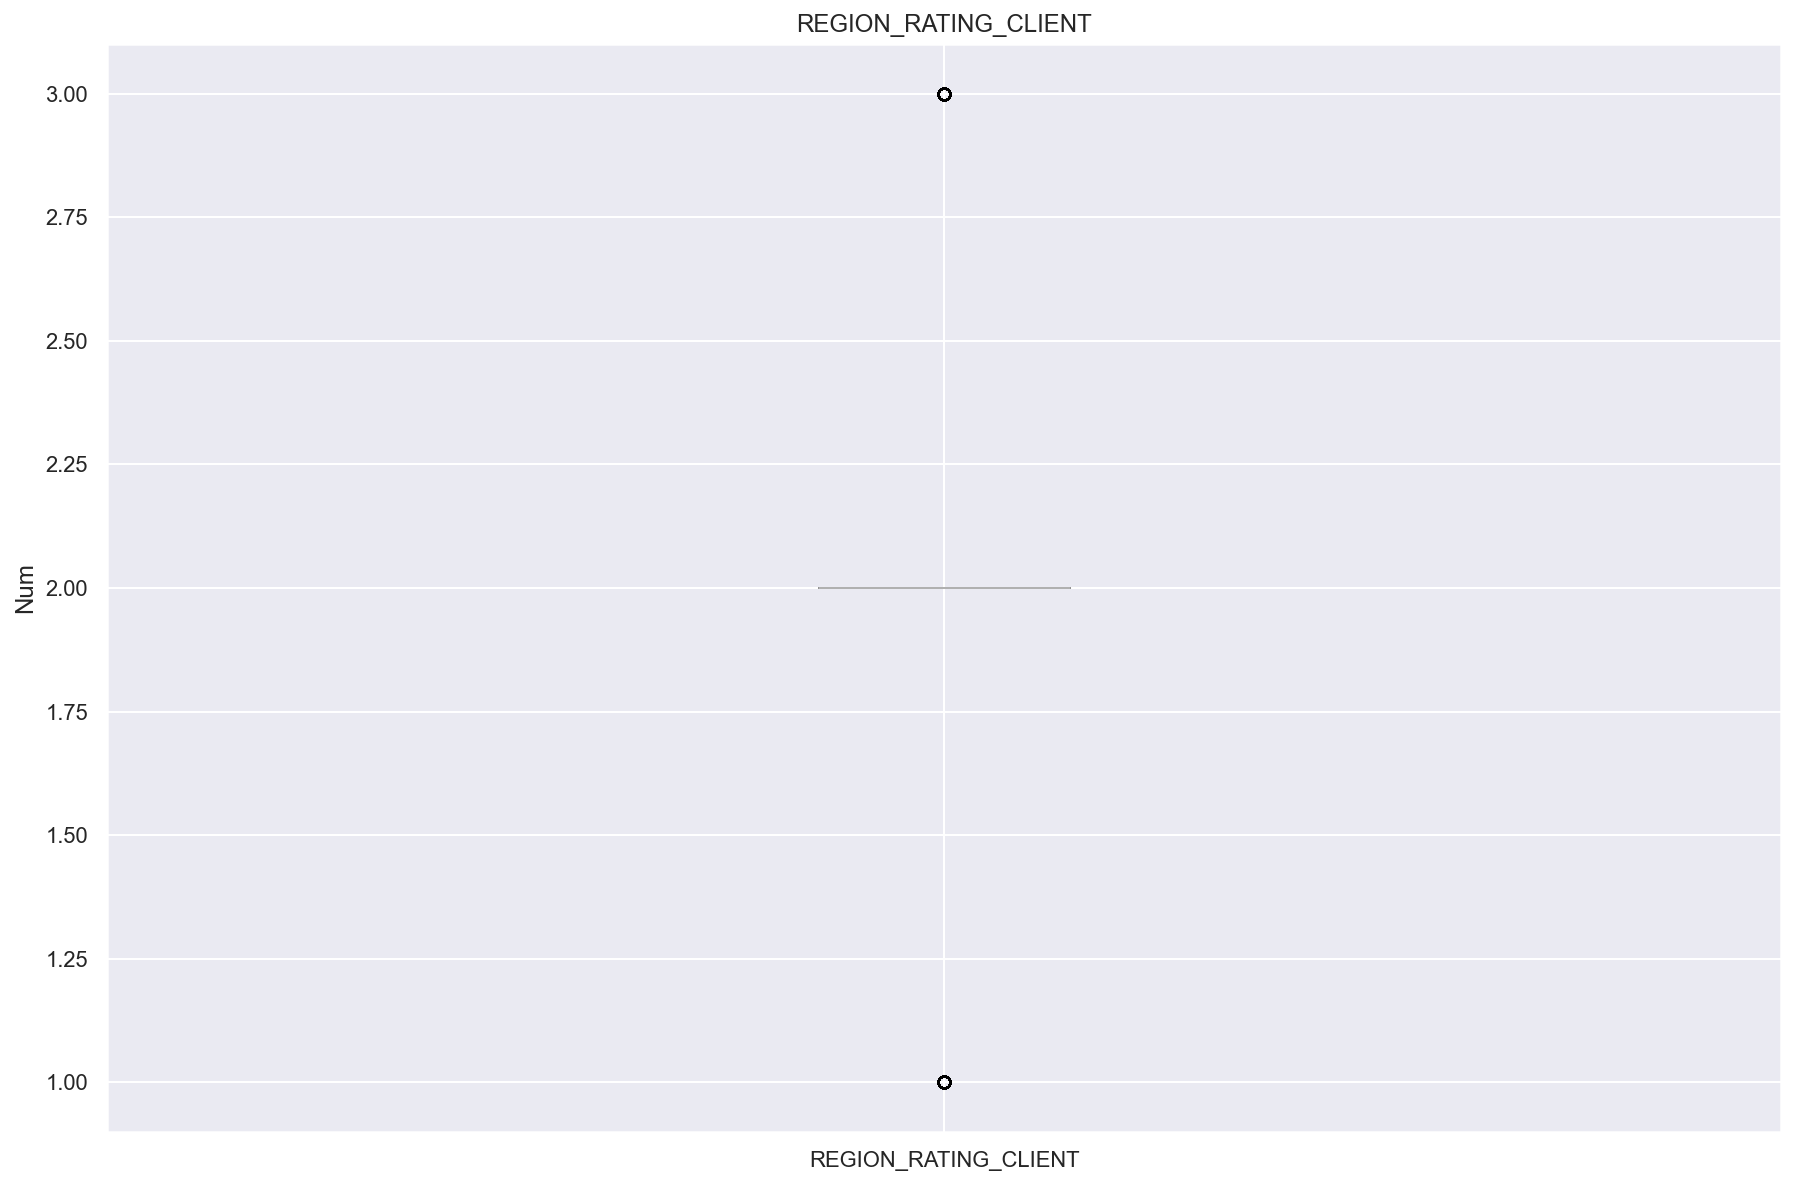

In [37]:
#printing boxplot of non binary numerical values
boxplot_cols = data[['CNT_CHILDREN', 'INCOME_TOTAL', 'CREDIT', 'FAM_MEMBERS', 'REGION_RATING_CLIENT']]

for column in boxplot_cols:
    plt.figure()
    data_boxplot = data.boxplot([column])
    data_boxplot.set_ylabel('Num')
    data_boxplot.set_title(column)

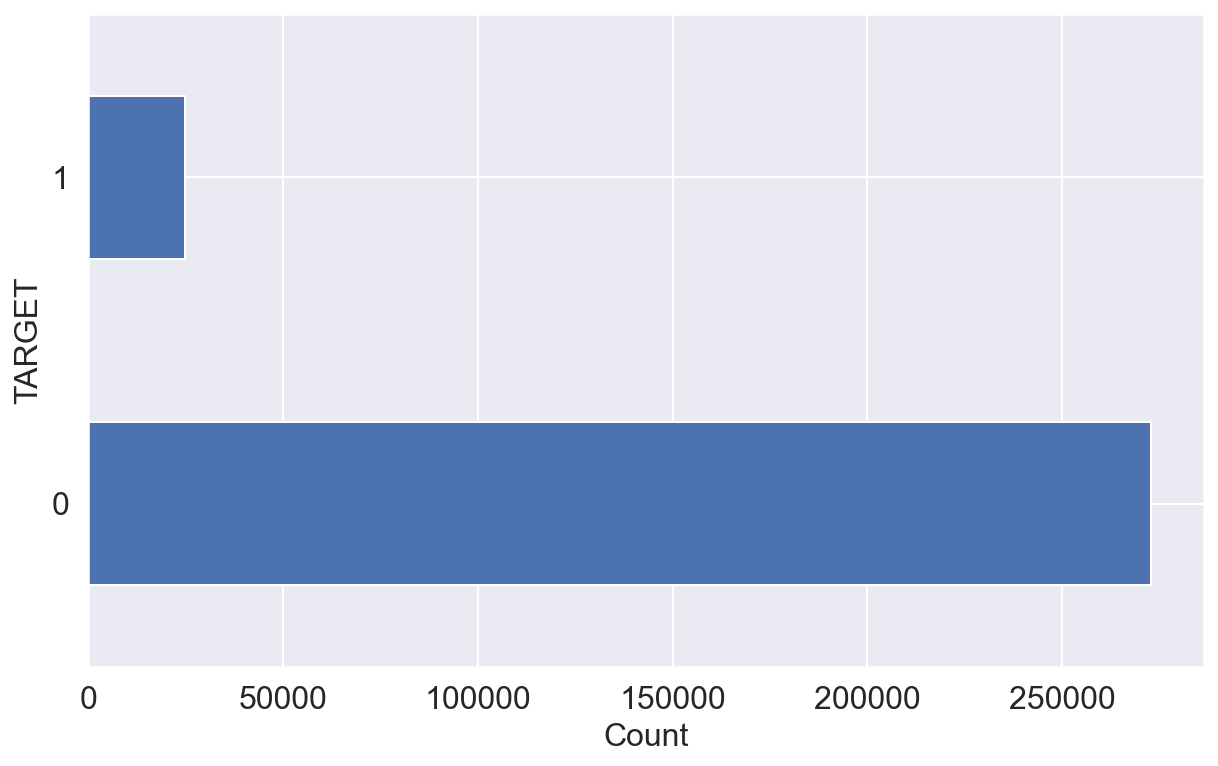

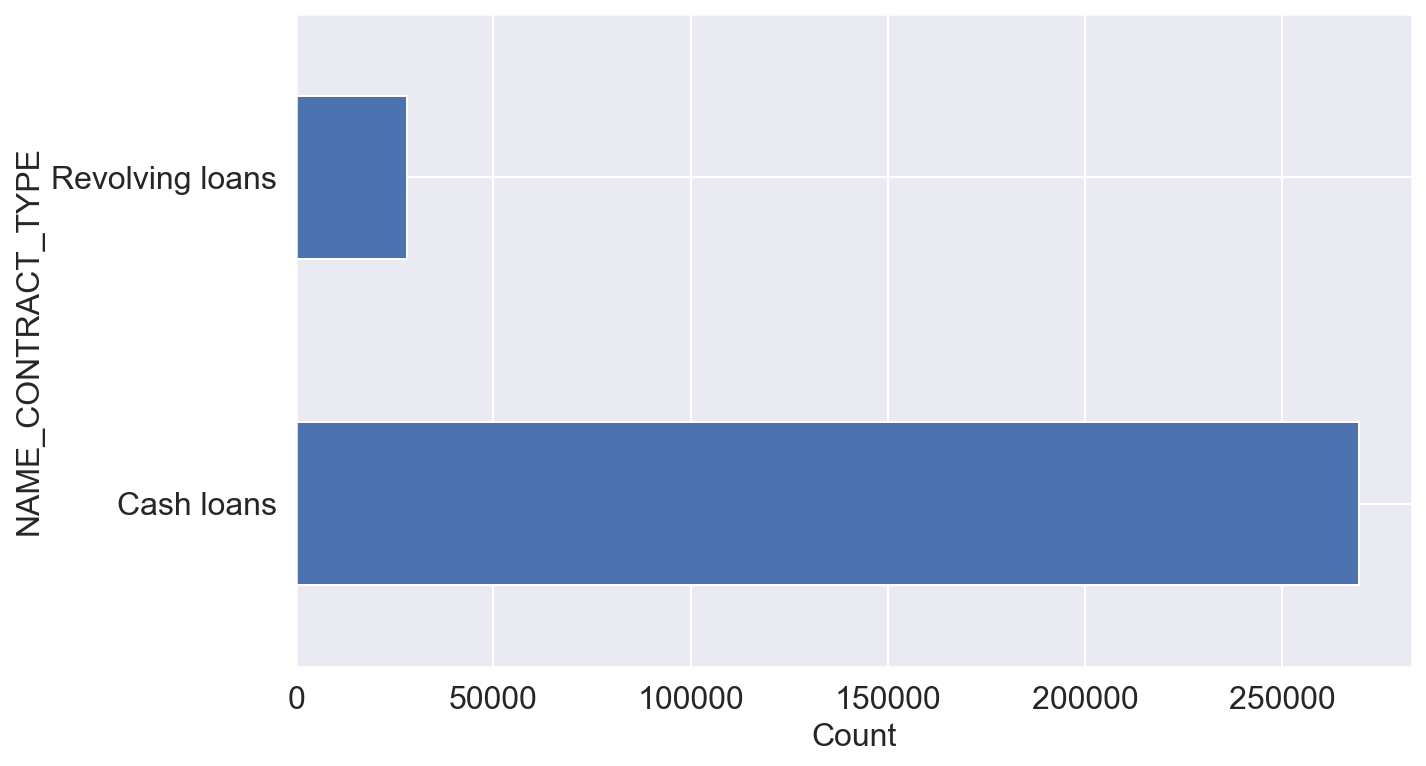

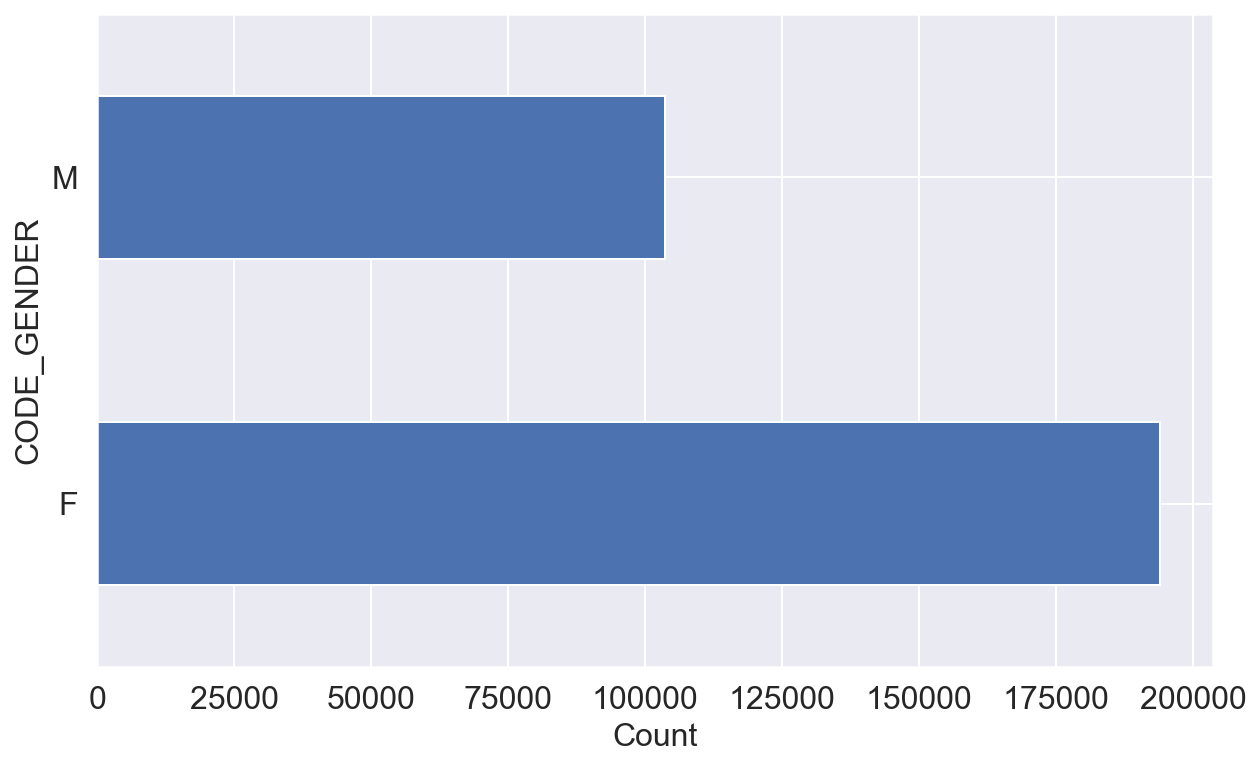

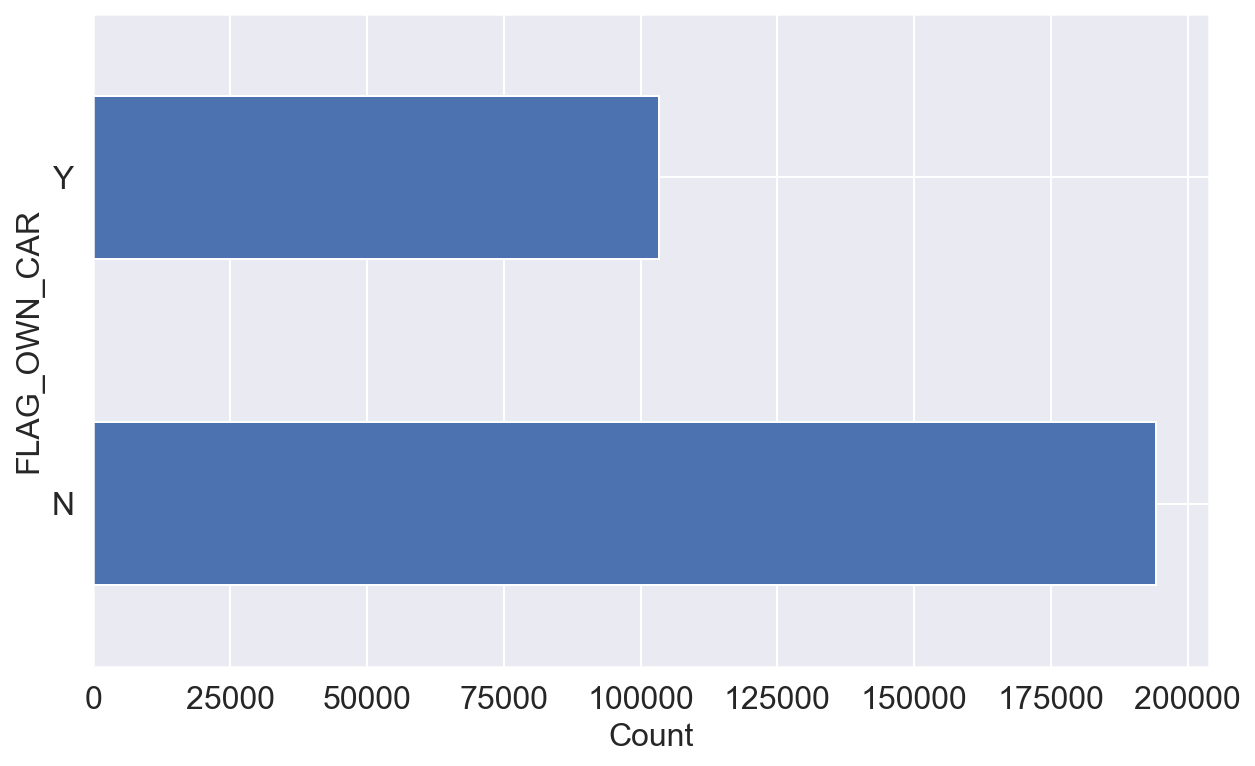

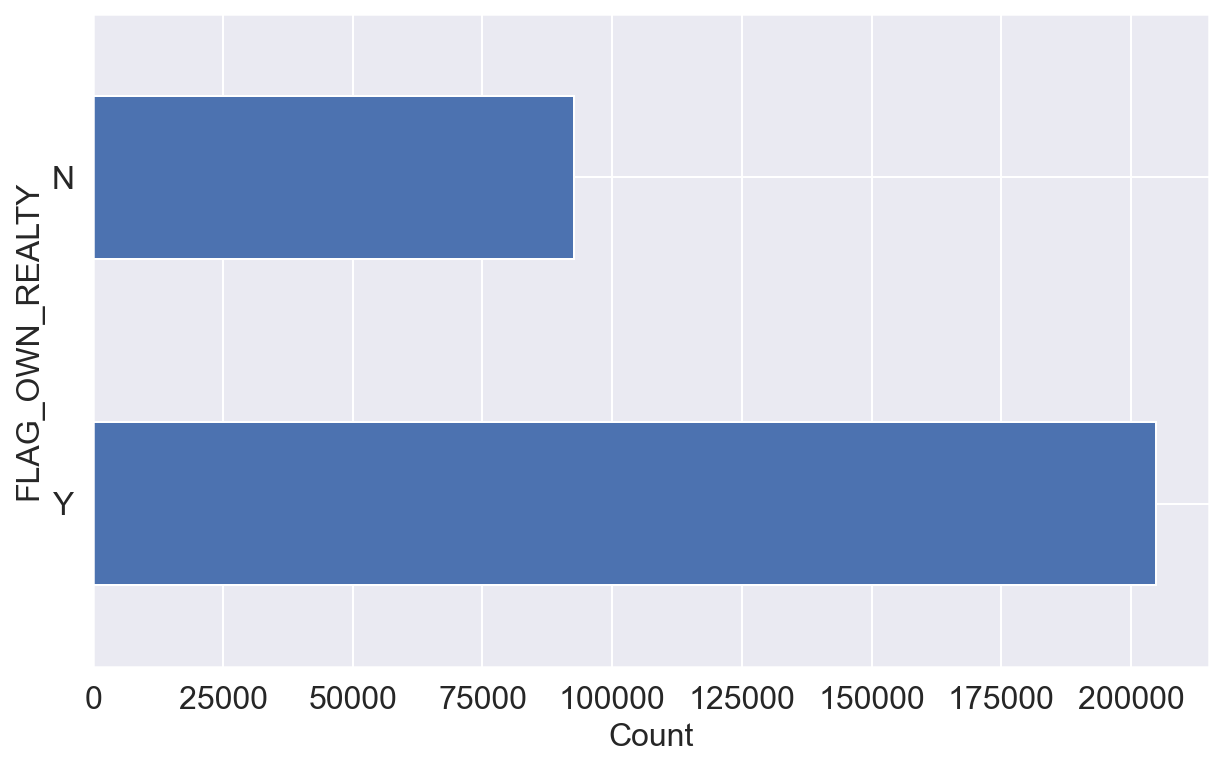

In [38]:
bar_cols = data[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

for x in bar_cols:
    col_counts = data[x].value_counts()
    fig = plt.figure()
    col_counts.plot.barh(figsize=(10, 6));
    plt.xlabel("Count", size=16);
    plt.ylabel(x, size=16)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

In [39]:
#normalising values which can be turned from categorical to numerical
data_copy =data
data_orig = data.copy()
data['NAME_CONTRACT_TYPE'].replace(['Cash loans', 'Revolving loans'],[0, 1], inplace=True)
data['CODE_GENDER'].replace(['M', 'F'],[0, 1], inplace=True)
data['FLAG_OWN_CAR'].replace(['N', 'Y'],[0, 1], inplace=True)
data['FLAG_OWN_REALTY'].replace(['N', 'Y'],[0, 1], inplace=True)
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,INCOME_TOTAL,CREDIT,NAME_INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,FAM_MEMBERS,REGION_RATING_CLIENT
0,1,0,0,0,1,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2
1,0,0,1,0,0,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,2.0,1
2,0,1,0,1,1,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2
3,0,0,1,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,2
4,0,0,0,0,1,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,2


<AxesSubplot:>

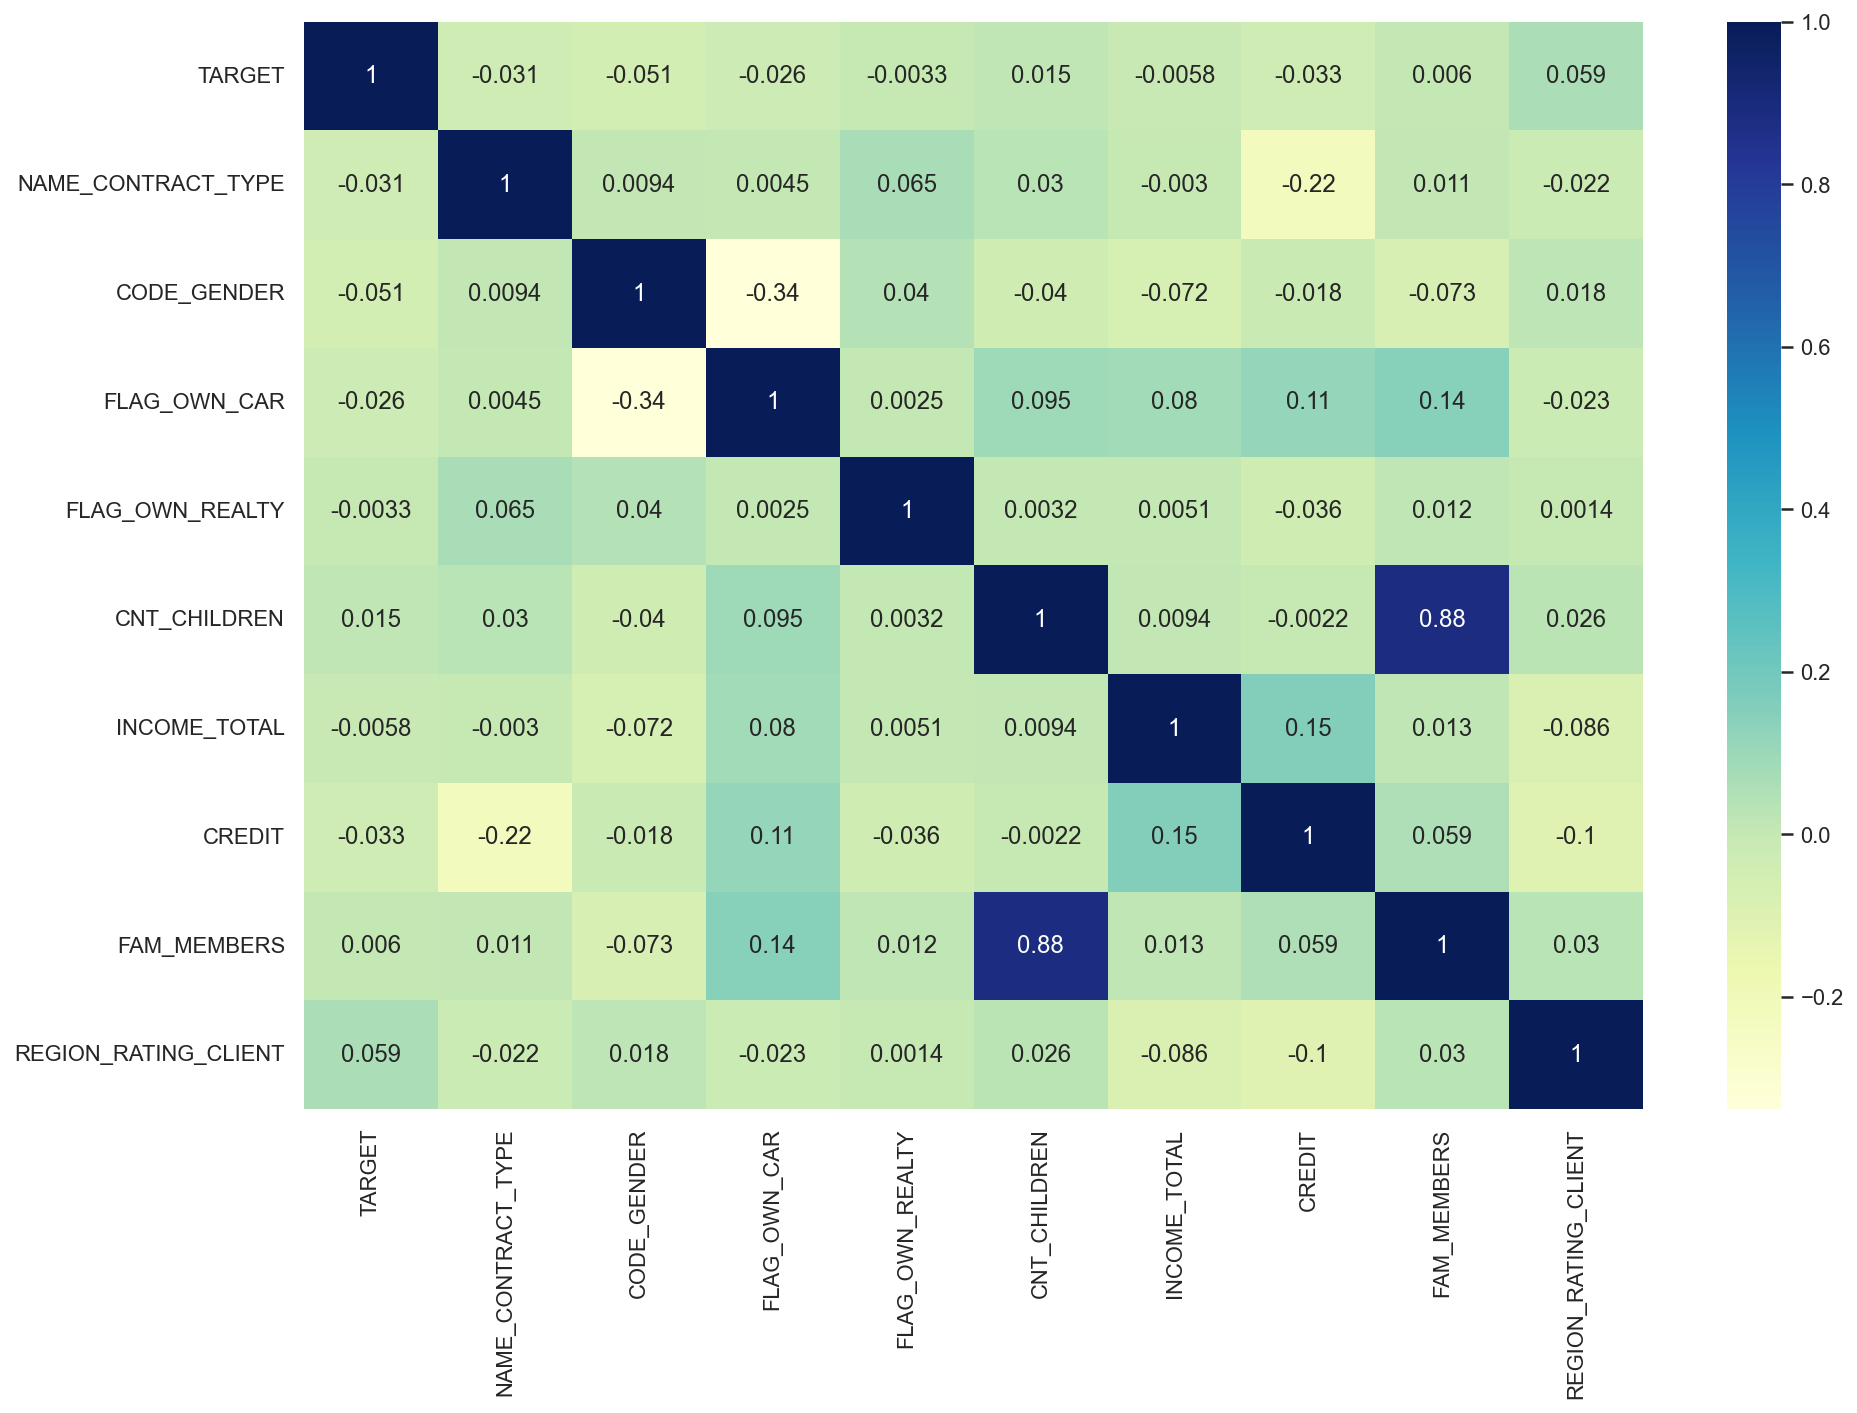

In [40]:
#Printing attribute correlations:
corelation = data.corr()
sns.set(rc = {'figure.figsize':(15,10)})

corelation = sns.heatmap(corelation, annot=True, cmap="YlGnBu")
display(corelation)

In [41]:
display(data_copy['NAME_INCOME_TYPE'].value_counts())

Working                 157071
Commercial associate     71338
Pensioner                47426
State servant            21659
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

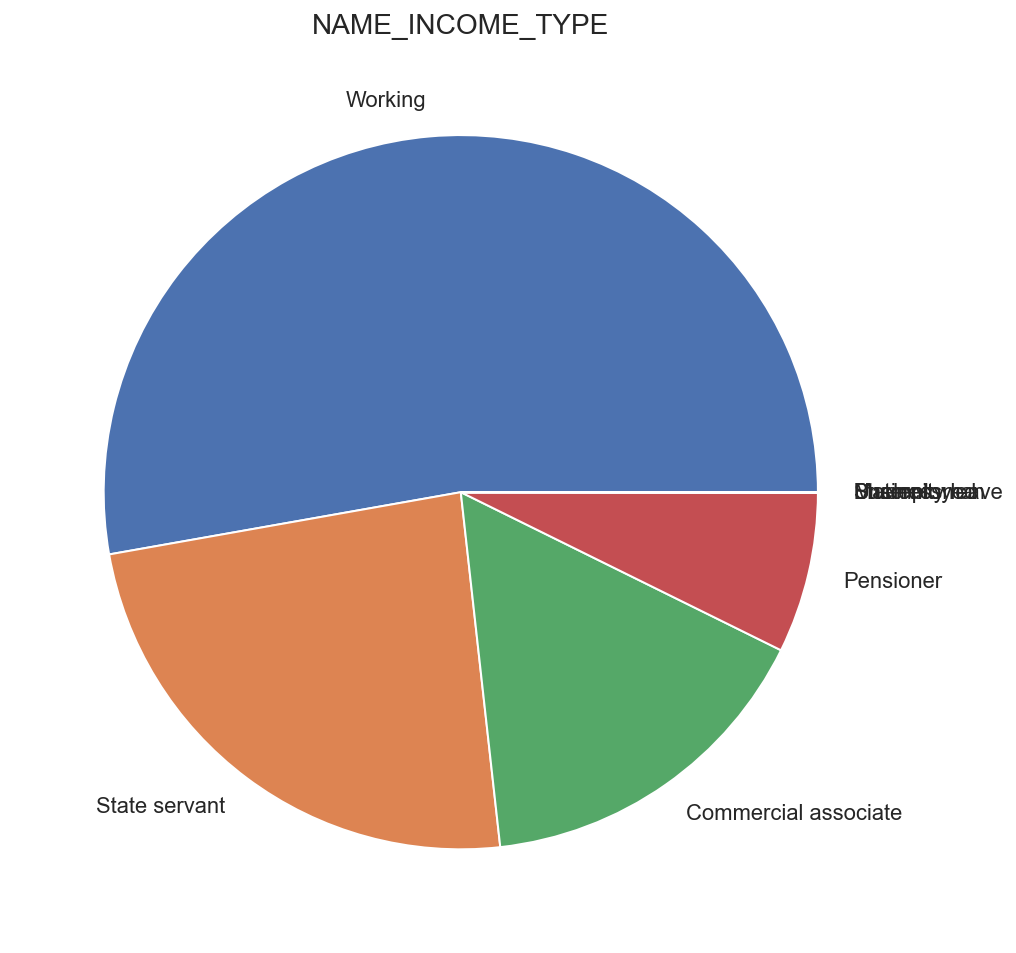

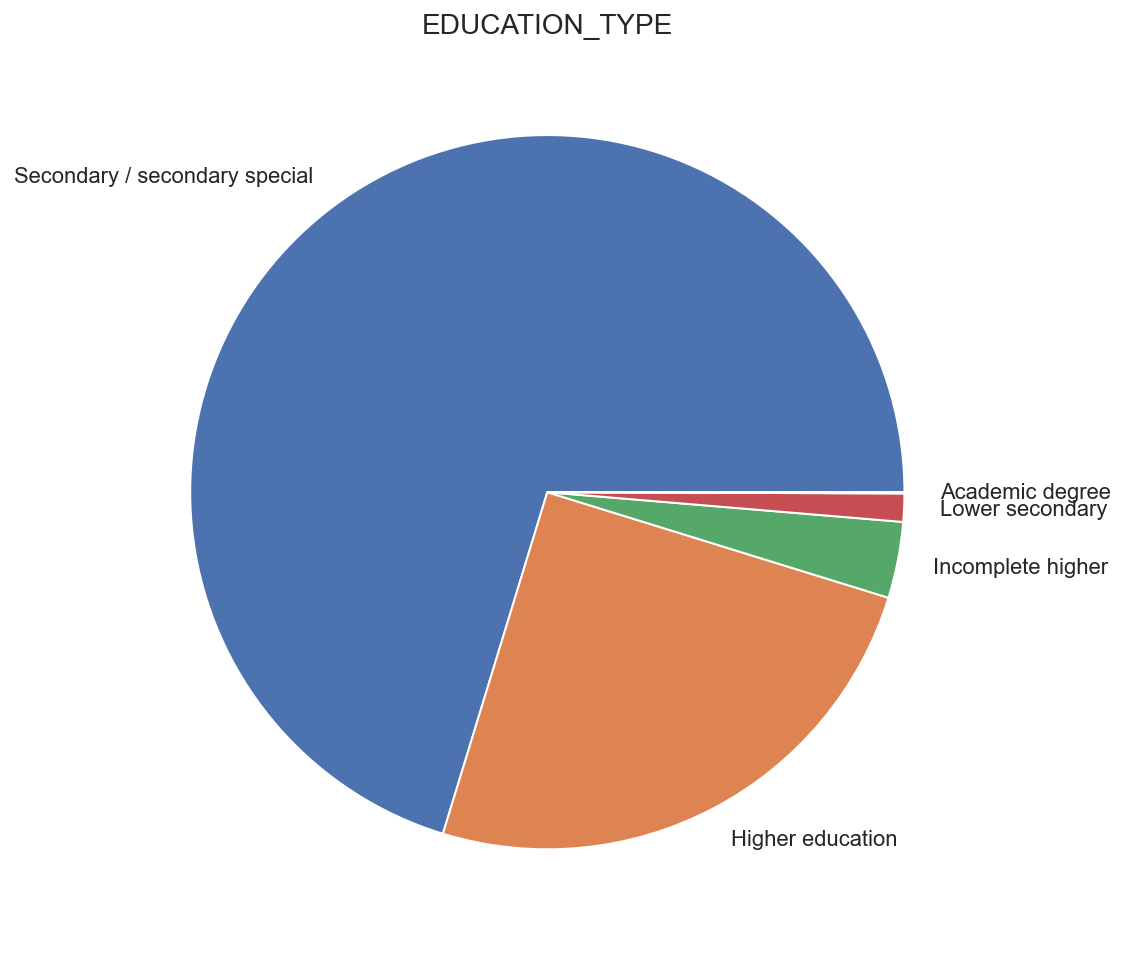

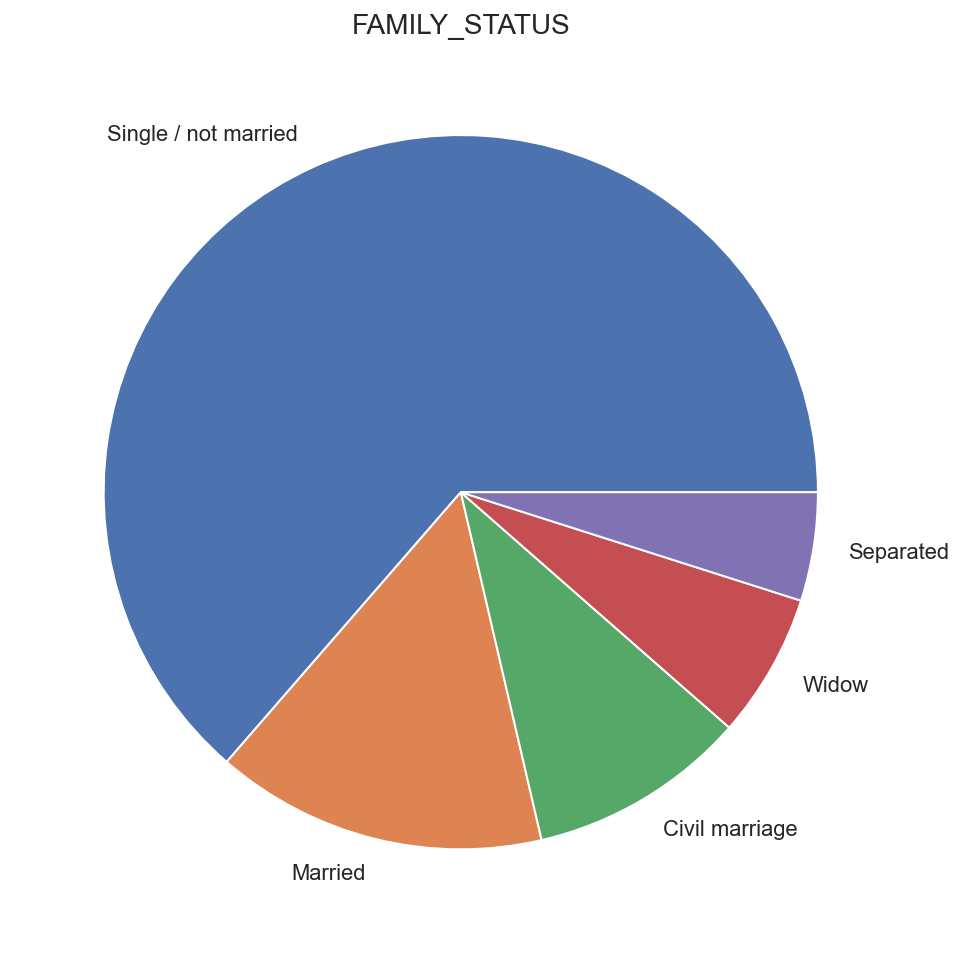

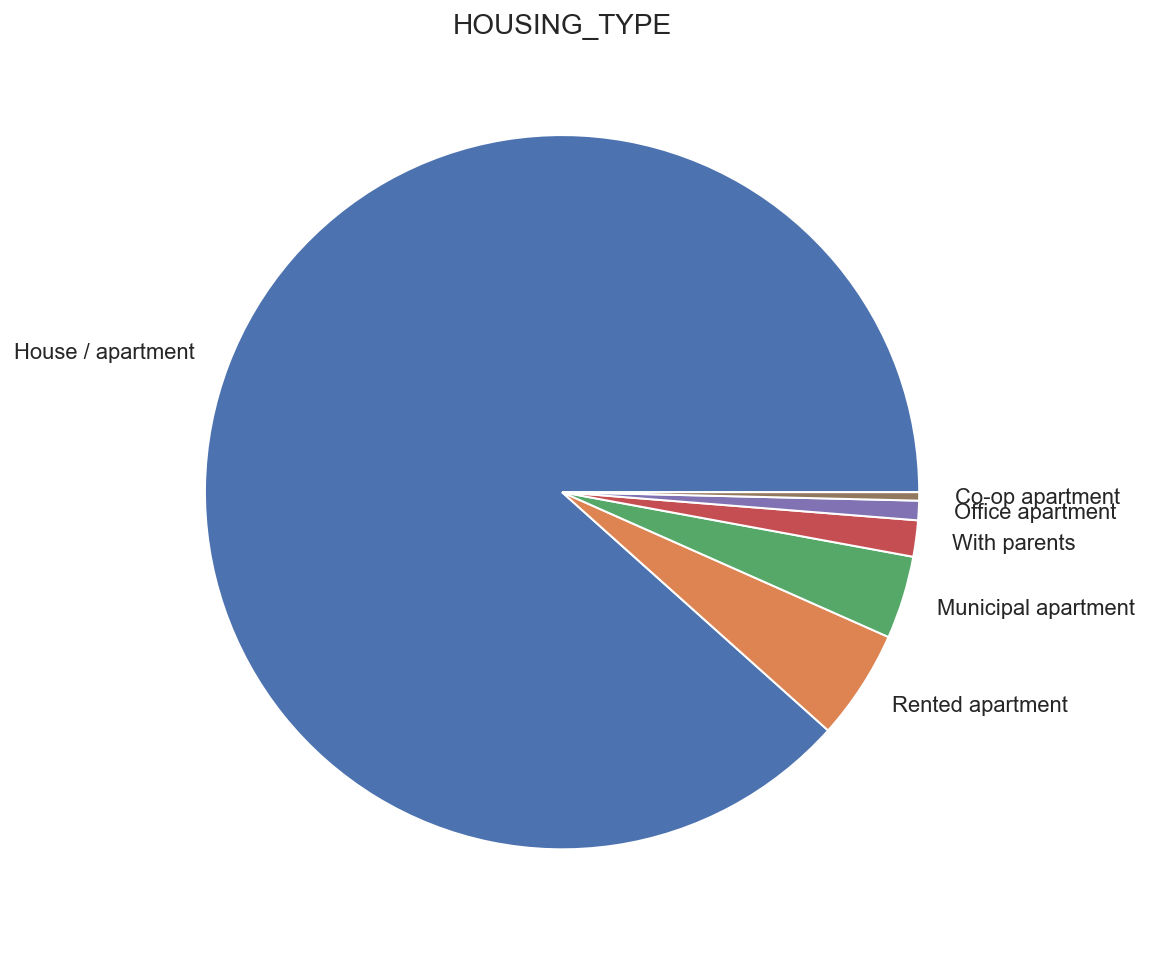

In [42]:
pie_cols =['NAME_INCOME_TYPE','EDUCATION_TYPE','FAMILY_STATUS','HOUSING_TYPE']
for x in pie_cols:
    pie_data = data_copy[x].value_counts()
    pie_label= data_copy[x].unique()
    pie, ax = plt.subplots(figsize=[8,12])
    plt.pie(pie_data,labels=pie_label)
    plt.title(x, fontsize=14);
    pie.savefig(x+".png")

In [43]:
data_np = data_orig.to_numpy()
defaulters = []
non_defaulters = []
for d in data_np:
  if d[0] == 1:
    temp = np.delete(d, [0,5,6,7, 12, 13])
    temp[2] = f'FC:{temp[2]}'
    temp[3] = f'FR:{temp[3]}'

    defaulters.append(temp)
  else:
    temp = np.delete(d, [0,5,6,7, 12, 13])
    temp[2] = f'FC:{temp[2]}'
    temp[3] = f'FR:{temp[3]}'

    # defaulters.append(temp)
    non_defaulters.append(temp)
print(defaulters[0], non_defaulters[0])

['Cash loans' 'M' 'FC:N' 'FR:Y' 'Working' 'Secondary / secondary special'
 'Single / not married' 'House / apartment'] ['Cash loans' 'F' 'FC:N' 'FR:N' 'State servant' 'Higher education'
 'Married' 'House / apartment']


In [43]:
from apyori import apriori
min_supports= [0.6, 0.7, 0.8]


In [46]:
for min_support in min_supports:
    res = list(apriori(defaulters, min_support=min_support))
    print(f'----Min Support---- {min_support}')
    for item in res:
        if len(item.items) >1:
            print(item.items)

----Min Support---- 0.6
frozenset({'FC:N', 'Cash loans'})
frozenset({'Cash loans', 'FR:Y'})
frozenset({'Cash loans', 'House / apartment'})
frozenset({'Secondary / secondary special', 'Cash loans'})
frozenset({'FR:Y', 'House / apartment'})
frozenset({'Secondary / secondary special', 'House / apartment'})
frozenset({'Secondary / secondary special', 'Cash loans', 'House / apartment'})
----Min Support---- 0.7
frozenset({'Cash loans', 'House / apartment'})
frozenset({'Secondary / secondary special', 'Cash loans'})
----Min Support---- 0.8
frozenset({'Cash loans', 'House / apartment'})


In [45]:
for min_support in min_supports:
    res = list(apriori(non_defaulters, min_support=min_support))
    print(f'----Min Support---- {min_support}')
    for item in res:
        if len(item.items) >1:
            print(item.items)

----Min Support---- 0.6
frozenset({'Cash loans', 'FR:Y'})
frozenset({'Cash loans', 'House / apartment'})
frozenset({'Secondary / secondary special', 'Cash loans'})
frozenset({'FR:Y', 'House / apartment'})
frozenset({'Secondary / secondary special', 'House / apartment'})
----Min Support---- 0.7
frozenset({'Cash loans', 'House / apartment'})
----Min Support---- 0.8
frozenset({'Cash loans', 'House / apartment'})


In [44]:
new_df = data.filter(['TARGET' , 'NAME_CONTRACT_TYPE'], axis=1)

new_df['NAME_CONTRACT_TYPE'].unique()

new_df['NAME_CONTRACT_TYPE'].replace(['Cash loans', 'Revolving loans'],
                        [0, 1], inplace=True)

new_df = new_df.dropna()

In [ ]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(new_df)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()




In [ ]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(new_df)


pred_df = pd.DataFrame(pred_y)

#new_df.insert((pred_df.shape[1]), 'pred_df',pred_df)

# new_df.head()


# Plot the data
plt.scatter(new_df['TARGET'], 
            new_df['NAME_CONTRACT_TYPE'])




scatter = ax.scatter(new_df['TARGET'],new_df['NAME_CONTRACT_TYPE'],c=pred_df[0],s=5)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()


In [ ]:
new_df = data.filter(['TARGET' , 'NAME_INCOME_TYPE'], axis=1)

new_df['NAME_INCOME_TYPE'].unique()

new_df['NAME_INCOME_TYPE'].replace(['Working', 'State servant' , 'Commercial associate' , 'Pensioner' , 'Unemployed' , 'Student' , 'Businessman' , 'Maternity leave'],
                        [0, 1 , 2 , 3 , 4 , 5 , 6 , 7], inplace=True)

new_df = new_df.dropna()




wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(new_df)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()







In [ ]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(new_df)


pred_df = pd.DataFrame(pred_y)

#new_df.insert((pred_df.shape[1]), 'pred_df',pred_df)

# new_df.head()


# Plot the data
plt.scatter(new_df['TARGET'], 
            new_df['NAME_INCOME_TYPE'])




scatter = ax.scatter(new_df['TARGET'],new_df['NAME_INCOME_TYPE'],c=pred_df[0],s=5)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()


In [ ]:


new_df = data.filter(['TARGET' , 'HOUSING_TYPE'], axis=1)



new_df['HOUSING_TYPE'].replace(['House / apartment' , 'Rented apartment' , 'With parents' , 'Municipal apartment' , 'Office apartment' , 'Co-op apartment'],
                        [0 , 1 , 3 , 4 , 5 , 6], inplace=True)

new_df = new_df.dropna()




wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(new_df)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()







In [ ]:
kmeans = KMeans(n_clusters = 5,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(new_df)


pred_df = pd.DataFrame(pred_y)

#new_df.insert((pred_df.shape[1]), 'pred_df',pred_df)

# new_df.head()


# Plot the data
# plt.scatter(new_df['TARGET'], 
#             new_df['HOUSING_TYPE'])


fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)




scatter = ax.scatter(new_df['TARGET'],new_df['HOUSING_TYPE'],c=pred_df[0],s=5)

# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=200,                             # Set centroid size
#             c='red')                           # Set centroid color
plt.show()


In [ ]:
new_df = data.filter(['FAM_MEMBERS' , 'REGION_RATING_CLIENT'], axis=1)


new_df = new_df.dropna()




wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(new_df)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()



In [ ]:
kmeans = KMeans(n_clusters = 8,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(new_df)


pred_df = pd.DataFrame(pred_y)

#new_df.insert((pred_df.shape[1]), 'pred_df',pred_df)

# new_df.head()


# # Plot the data
# plt.scatter(new_df['TARGET'], 
#             new_df['REGION_RATING_CLIENT'])

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)


scatter = ax.scatter(new_df['FAM_MEMBERS'],new_df['REGION_RATING_CLIENT'],c=pred_df[0],s=5)

# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=200,                             # Set centroid size
#             c='red')                           # Set centroid color
plt.show()


In [ ]:


new_df = data.filter(['INCOME_TOTAL' , 'CREDIT'], axis=1)


new_df = new_df[(new_df['INCOME_TOTAL'] < 0.2E7) ]

# Q1 = np.percentile(new_df['INCOME_TOTAL'], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(new_df['INCOME_TOTAL'], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1

# # Upper bound
# upper = np.where(new_df['INCOME_TOTAL'] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(new_df['INCOME_TOTAL'] <= (Q1-1.5*IQR))
 
# ''' Removing the Outliers '''
# new_df['INCOME_TOTAL'].drop(upper[0], inplace = True)
# new_df['INCOME_TOTAL'].drop(lower[0], inplace = True)
 

new_df = new_df.dropna()




wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(new_df)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()



In [ ]:
kmeans = KMeans(n_clusters = 6,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(new_df)


pred_df = pd.DataFrame(pred_y)

#new_df.insert((pred_df.shape[1]), 'pred_df',pred_df)

# new_df.head()


# # Plot the data
# plt.scatter(new_df['TARGET'], 
#             new_df['REGION_RATING_CLIENT'])

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)


scatter = ax.scatter(new_df['INCOME_TOTAL'],new_df['CREDIT'],c=pred_df[0],s=5)

# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=200,                             # Set centroid size
#             c='red')                           # Set centroid color
plt.show()

In [ ]:
new_df = data.filter(['TT'ARGE , 'FLAG_OWN_REALTY'], axis=1)

new_df['FLAG_OWN_REALTY'].replace(["Y" , "N"],
                        [1 , 0], inplace=True)

new_df = new_df.dropna()




wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(new_df)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()




In [ ]:
kmeans = KMeans(n_clusters = 4,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(new_df)


pred_df = pd.DataFrame(pred_y)

#new_df.insert((pred_df.shape[1]), 'pred_df',pred_df)

# new_df.head()


# # Plot the data
# plt.scatter(new_df['TARGET'], 
#             new_df['REGION_RATING_CLIENT'])

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)


scatter = ax.scatter(new_df['TARGET'],new_df['FLAG_OWN_REALTY'],c=pred_df[0],s=5)

# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=200,                             # Set centroid size
#             c='red')                           # Set centroid color
plt.show()